In [40]:
%reload_ext autoreload
%autoreload 2

In [41]:
from os import listdir
import pandas as pd
import numpy as np

In [42]:
from dlmi.visualization import *
from dlmi.utils import *
search_type = 'leaf'

# Graph 1 -- SIFT -- 1M

In [55]:
sift_dyn_base = '../experiments/2022-12-02--10-12-30-13425037-SIFT-1000000-adan7.grid.cesnet.cz'
sift_bulk_base = '../experiments/2022-12-30--18-38-41-13825624-SIFT-bulk-MLP-1000000-adan6.grid.cesnet.cz'
sift_naive_dyn_base = '../experiments/2022-12-31--19-29-57-13828510-SIFT-bulk-MLP-1000000-adan52.grid.cesnet.cz'
lmi = load_pickle(f'{sift_naive_dyn_base}/index/index.pkl')

#### Plotting out the bucket occupancy distributions

In [44]:
struct_dyn = pd.read_csv(f'{sift_dyn_base}/struct/str-36.csv')
struct_dyn.head()

,key,type,children
0,"(0,)",InnerNode,100
1,"(0, 0)",InnerNode,93
2,"(0, 4)",InnerNode,90
3,"(0, 5)",InnerNode,93
4,"(0, 6)",InnerNode,96


In [45]:
struct_bulk = pd.read_csv(f'{sift_bulk_base}/struct/str-99.csv')
struct_bulk.head()

,key,type,children
0,"(0,)",InnerNode,100
1,"(0, 0)",InnerNode,120
2,"(0, 0, 0)",LeafNode,98
3,"(0, 0, 1)",LeafNode,36
4,"(0, 0, 2)",LeafNode,61


In [46]:
struct_bulk[struct_bulk['type'] == 'LeafNode']['children'].sum()

1000000

In [56]:
struct_naive_dyn = lmi.dump_structure()

In [14]:
struct_naive_dyn[struct_naive_dyn['type'] == 'LeafNode']['children'].value_counts()

618     6
706     6
600     5
616     4
752     4
       ..
558     1
1583    1
560     1
564     1
530     1
Name: children, Length: 782, dtype: int64

In [57]:
struct_naive_dyn[struct_naive_dyn['type'] == 'LeafNode']['children'].count()

1200

In [16]:
struct_naive_dyn[struct_naive_dyn['type'] == 'LeafNode']['children'].sum()

1000000

In [58]:
import matplotlib
font = {'size': 16}

matplotlib.rc('font', **font)

In [62]:
def plot_bucket_occupancy(struct_dyn, struct_naive_dyn, struct_bulk, dataset='SIFT', n_objs='1M'):
    colors = ['#D7191C', '#2C7BB6', '#0D8A51']
    
    fig, ax = plt.subplots(1, 1, figsize=(15, 3))
    y_dyn = struct_dyn[struct_dyn['type'] == 'LeafNode'].sort_values(by=['children'], ascending=False)['children']
    y_n_dyn = struct_naive_dyn[struct_naive_dyn['type'] == 'LeafNode'].sort_values(by=['children'], ascending=False)['children']
    y_bulk = struct_bulk[struct_bulk['type'] == 'LeafNode'].sort_values(by=['children'], ascending=False)['children']
    ax.bar(np.arange(y_dyn.shape[0]), y_dyn, label='Dynamic', color=colors[1], alpha=0.5)
    #ax.hlines(y=np.mean(y_dyn), xmin=0, xmax=1, linewidth=1, color=colors[1])
    ax.bar(np.arange(y_n_dyn.shape[0]), y_n_dyn, label='Naive ins.', color=colors[2], alpha=0.5)
    #ax.hlines(y=np.mean(y_n_dyn), xmin=0, xmax=1, linewidth=1, color=colors[2])
    ax.bar(np.arange(y_bulk.shape[0]), y_bulk, label='Static', color=colors[0], alpha=0.5)
    ax.hlines(y=np.mean(y_dyn), xmin=0, xmax=y_dyn.shape[0], linewidth=1.5, color=colors[1])
    #ax.hlines(y=np.mean(y_n_dyn), xmin=0, xmax=y_dyn.shape[0], linewidth=1.5, color=colors[2])
    ax.hlines(y=np.mean(y_bulk), xmin=0, xmax=y_dyn.shape[0], linewidth=1.5, color=colors[0])
    ax.hlines(y=np.mean(y_n_dyn), xmin=0, xmax=y_dyn.shape[0], linewidth=1.5, color=colors[2])
    #ax.plot([0, 1], [np.mean(y_dyn), np.mean(y_dyn)], color=colors[1], marker="--")
    #ax.hlines(y=[np.mean(y_dyn), np.mean(y_n_dyn), np.mean(y_bulk)], xmin=[0, 0, 0], xmax=[1, 1, 1], linewidth=2, color=[colors[1], colors[2], colors[0]], label='means')
    order = [0,2,1]
    handles, labels = plt.gca().get_legend_handles_labels()
    ax.legend([handles[idx] for idx in order],[labels[idx] for idx in order])
    ax.set_title(f'Leaf node occupancy distributions, {dataset}, {n_objs} objects.')
    ax.set_xlabel('Leaf node')
    ax.set_ylabel('# of objects\nin the leaf node')
    ax.set_yscale('log')
    ax.set_xlim(xmin=-1, xmax=y_dyn.shape[0])
    plt.grid()
    return fig

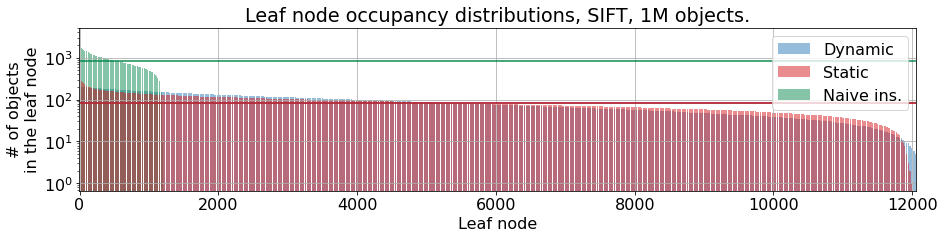

In [64]:
fig = plot_bucket_occupancy(struct_dyn, struct_naive_dyn, struct_bulk)

In [65]:
fig.savefig('../figures/leaf-node-occupancy-sift-log-hline.pdf', format='pdf', bbox_inches='tight')

# Graph 2 -- glove -- 100k

In [66]:
glove_dyn_base = '../experiments/2022-12-06--13-02-36-13588496-GLOVE-1183514-adan4.grid.cesnet.cz'
glove_bulk_base = '../experiments/2022-12-30--21-13-10-13825627-GLOVE-bulk-MLP-100000-adan4.grid.cesnet.cz'
glove_naive_dyn_base = '../experiments/2022-12-31--22-57-06-13827751-GLOVE-bulk-MLP-100000-adan4.grid.cesnet.cz'
lmi = load_pickle(f'{glove_naive_dyn_base}/index/index.pkl')

In [67]:
struct_dyn = pd.read_csv(f'{glove_dyn_base}/struct/str-27.csv')
struct_bulk = pd.read_csv(f'{glove_bulk_base}/struct/str-99.csv')
struct_naive_dyn = lmi.dump_structure()

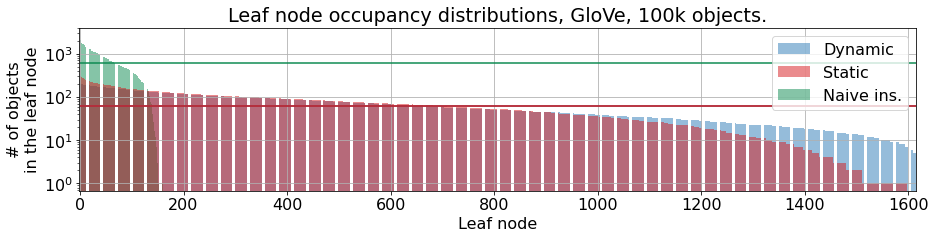

In [68]:
fig = plot_bucket_occupancy(struct_dyn, struct_naive_dyn, struct_bulk, 'GloVe', '100k')

In [69]:
fig.savefig('../figures/leaf-node-occupancy-glove-log-hline.pdf', format='pdf', bbox_inches='tight')

# Graph 3 -- Deep -- 100k

In [70]:
deep1b_dyn_base = '../experiments/2022-12-06--13-17-32-13588502-DEEP1B-9990000-adan8.grid.cesnet.cz'
deep1b_bulk_100k = '../experiments/2022-12-31--19-48-10-13828512-DEEP1B-bulk-MLP-100000-adan34.grid.cesnet.cz'##
#deep1b_bulk_100k = '../experiments/2022-12-31--17-29-56-13828450-DEEP1B-bulk-MLP-100000-adan50.grid.cesnet.cz'
deep1b_naive_dyn_base = '../experiments/2022-12-31--09-42-11-13827750-DEEP1B-bulk-MLP-100000-adan8.grid.cesnet.cz'
lmi = load_pickle(f'{deep1b_naive_dyn_base}/index/index.pkl')

In [71]:
struct_naive_dyn = lmi.dump_structure()

In [72]:
struct_dyn = pd.read_csv(f'{deep1b_dyn_base}/struct/str-27.csv')
struct_bulk = pd.read_csv(f'{deep1b_bulk_100k}/struct/str-99.csv')

In [73]:
struct_bulk.head()

,key,type,children
0,"(0,)",InnerNode,100
1,"(0, 0)",InnerNode,16
2,"(0, 0, 0)",LeafNode,20
3,"(0, 0, 1)",LeafNode,71
4,"(0, 0, 2)",LeafNode,49


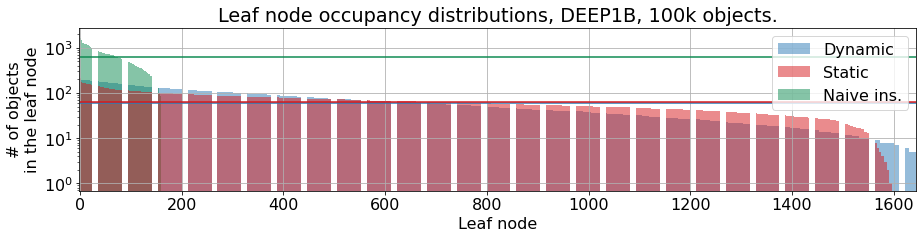

In [74]:
fig = plot_bucket_occupancy(struct_dyn, struct_naive_dyn, struct_bulk, 'DEEP1B', '100k')

In [75]:
fig.savefig('../figures/leaf-node-occupancy-deep1b-log-hline.pdf', format='pdf', bbox_inches='tight')